# SET UP WORKSPACE

In [1]:
# Import Libraries
import numpy as np                                     # For linear algebra
import pandas as pd                                    # For data manipulation
import math                                            # For maths
import matplotlib.pyplot as plt                        # For plotting
from pandas.plotting import autocorrelation_plot       # For autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf     # For autocorrelation line plot
from statsmodels.graphics.tsaplots import plot_pacf    # For partial autocorrelation plot
from pandas.plotting import lag_plot                   # For lag plot
#from sklearn.preprocessing import StandardScaler       # For standardization of data
from sklearn.decomposition import PCA                  # For PCA
from sklearn.linear_model import LinearRegression      # For regressions
from sklearn.model_selection import TimeSeriesSplit    # For test/train splits
from IPython.display import Image                      # For displaying images

In [2]:
# Load data
df = pd.read_excel('assets/data.xlsm')

In [3]:
# Save loaded df as total_df
total_df = pd.DataFrame(df)

In [4]:
spy = pd.read_csv('assets/SPY.csv')
ust = pd.read_csv('assets/3-10UST.csv')
bkx = pd.read_csv('assets/^BKX.csv')
eur = pd.read_csv('assets/EURUSD=X.csv')
jpy = pd.read_csv('assets/JPY=X.csv')
vix = pd.read_csv('assets/^VIX.csv')
wti = pd.read_csv('assets/WTI.csv')

# DATA PREP - Build the data set

In [5]:
# Take a look at the SPY data
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,92.788483,118944600
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,93.034081,111579900
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,93.099579,116074400
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,93.492622,131091100
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,93.803726,126402800


### The SPY data include columns that are not needed. Drop all but the close and date columns.

In [6]:
# Drop columns
spy_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
spy = spy.drop(spy_cols, axis=1)

# Change column name
spy.rename(columns={'Close':'spy'}, inplace=True)

# Print columns
spy.columns

Index(['Date', 'spy'], dtype='object')

In [7]:
# Take a look at the 10 year 3 month US Treasury spread data
ust.head()

,DATE,T10Y3M
0,2010-01-04,3.77
1,2010-01-05,3.70
2,2010-01-06,3.79
3,2010-01-07,3.80
4,2010-01-08,3.78


In [8]:
# Change column name
ust.rename(columns={'T10Y3M':'ust'}, inplace=True)

# Print columns
ust.columns

Index(['DATE', 'ust'], dtype='object')

### The US Treasury data above looks good for the moment.

In [9]:
# Take a look at the BKX data
bkx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,42.709999,43.770000,42.709999,43.68,43.68,1.385209e+10
1,2010-01-05,43.680000,44.720001,43.639999,44.66,44.66,1.921731e+10
2,2010-01-06,44.660000,45.380001,44.389999,45.23,45.23,1.725584e+10
3,2010-01-07,45.230000,47.470001,45.130001,47.09,47.09,2.426611e+10
4,2010-01-08,47.070000,47.299999,46.509998,47.00,47.00,1.657134e+10


### The BKX data include columns that are not needed. Drop all but the close and date columns.

In [10]:
# Drop columns
bkx_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
bkx = bkx.drop(bkx_cols, axis=1)

# Change column name
bkx.rename(columns={'Close':'bkx'}, inplace=True)

# Print columns
bkx.columns

Index(['Date', 'bkx'], dtype='object')

In [11]:
# Take a look at the EUR/USD
eur.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0.0
1,2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0.0
2,2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0.0
3,2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0.0
4,2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0.0


### The EUR/USD data include columns that are not needed. Drop all but the close and date columns.

In [12]:
# Drop columns
eur_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
eur = eur.drop(eur_cols, axis=1)

# Change column name
eur.rename(columns={'Close':'eur'}, inplace=True)

# Print columns
eur.columns

Index(['Date', 'eur'], dtype='object')

In [13]:
# Take a look at the USD/JPY data
jpy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,92.940002,93.089996,92.919998,92.919998,92.919998,0.0
1,2010-01-04,92.760002,93.200996,92.196999,92.495003,92.495003,0.0
2,2010-01-05,92.470001,92.486000,91.282997,91.584999,91.584999,0.0
3,2010-01-06,91.550003,92.709999,91.522003,92.356003,92.356003,0.0
4,2010-01-07,92.335999,93.735001,92.110001,93.389999,93.389999,0.0


### The USD/JPY data include columns that are not needed. Drop all but the close and date columns.

In [14]:
# Drop columns
jpy_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
jpy = jpy.drop(jpy_cols, axis=1)

# Change column name
jpy.rename(columns={'Close':'jpy'}, inplace=True)

# Print columns
jpy.columns

Index(['Date', 'jpy'], dtype='object')

In [15]:
# Take a look at the VIX data
vix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,21.680000,21.680000,20.030001,20.040001,20.040001,0
1,2010-01-05,20.049999,20.129999,19.340000,19.350000,19.350000,0
2,2010-01-06,19.590000,19.680000,18.770000,19.160000,19.160000,0
3,2010-01-07,19.680000,19.709999,18.700001,19.059999,19.059999,0
4,2010-01-08,19.270000,19.270000,18.110001,18.129999,18.129999,0


### The VIX data include columns that are not needed. Drop all but the close and date columns.

In [16]:
# Drop columns
vix_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
vix = vix.drop(vix_cols, axis=1)

# Change column name
vix.rename(columns={'Close':'vix'}, inplace=True)

# Print columns
vix.columns

Index(['Date', 'vix'], dtype='object')

In [17]:
# Take a look at the WTI data
wti.head()

,DATE,DCOILWTICO
0,2010-01-04,81.52
1,2010-01-05,81.74
2,2010-01-06,83.12
3,2010-01-07,82.60
4,2010-01-08,82.74


In [18]:
# Change column name
wti.rename(columns={'DCOILWTICO':'wti'}, inplace=True)

# Print columns
wti.columns

Index(['DATE', 'wti'], dtype='object')

### The WTI data above looks good for the moment. We want to make sure that the dates align between the dependent and independent variables. Let's start by taking a look at the number of observations for each variable.

In [19]:
# Print the length of each variable
print('SPY obs: ', len(spy[:]))
print('UST obs: ', len(ust[:]))
print('BKX obs: ', len(bkx[:]))
print('EUR obs: ', len(eur[:]))
print('JPY obs: ', len(jpy[:]))
print('VIX obs: ', len(vix[:]))
print('WTI obs: ', len(wti[:]))

SPY obs:  2515
UST obs:  2607
BKX obs:  2515
EUR obs:  2608
JPY obs:  2608
VIX obs:  2515
WTI obs:  2607


### We can see that the number of observations is not the same for each data set. It looks like the equity marked data have 2,515 observations each, the currency data have 2,608 observations, and treasury and commodity data have 2,607. The data will need to be limited to observations made from Monday to Friday.

In [20]:
# Drop rows that do not match the SPY date data for each data set.
bkx = bkx[bkx.Date.isin(spy.Date)]
ust = ust[ust.DATE.isin(spy.Date)]
eur = eur[eur.Date.isin(spy.Date)]
jpy = jpy[jpy.Date.isin(spy.Date)]
wti = wti[wti.DATE.isin(spy.Date)]
vix = vix[vix.Date.isin(spy.Date)]

# Print the length of each variable
print('SPY obs: ', len(spy[:]))
print('UST obs: ', len(ust[:]))
print('BKX obs: ', len(bkx[:]))
print('EUR obs: ', len(eur[:]))
print('JPY obs: ', len(jpy[:]))
print('VIX obs: ', len(vix[:]))
print('WTI obs: ', len(wti[:]))

SPY obs:  2515
UST obs:  2515
BKX obs:  2515
EUR obs:  2515
JPY obs:  2515
VIX obs:  2515
WTI obs:  2515


In [21]:
# Create one dataframe 
total_df = pd.DataFrame(pd.concat([spy, ust['ust']], axis=1))
total_df = pd.concat([total_df, bkx['bkx'], eur['eur'],
                      jpy['jpy'], vix['vix'], wti['wti']],
                      axis=1)

# Change name of Date column to date
total_df.rename(columns={'Date':'date'}, inplace=True)

# Print columns
total_df.columns

Index(['date', 'spy', 'ust', 'bkx', 'eur', 'jpy', 'vix', 'wti'], dtype='object')

In [22]:
total_df.dtypes

date     object
spy     float64
ust      object
bkx     float64
eur     float64
jpy     float64
vix     float64
wti      object
dtype: object

### The UST and WTI data are objects. Let's change all columns to numeric type. While we are at it, let's drop all but to places to the right of the decimal.

In [23]:
# Convert ust and wti column data to numeric type
total_df['ust'] = pd.to_numeric(total_df['ust'], errors='coerce')
total_df['bkx'] = pd.to_numeric(total_df['bkx'], errors='coerce')
total_df['eur'] = pd.to_numeric(total_df['eur'], errors='coerce')
total_df['jpy'] = pd.to_numeric(total_df['jpy'], errors='coerce')
total_df['vix'] = pd.to_numeric(total_df['vix'], errors='coerce')
total_df['wti'] = pd.to_numeric(total_df['wti'], errors='coerce')

# Drop decimals
total_df = total_df.round(decimals=2)

# Take a look
total_df.head()

,date,spy,ust,bkx,eur,jpy,vix,wti
0,2010-01-04,113.33,3.77,43.68,NaN,NaN,20.04,81.52
1,2010-01-05,113.63,3.70,44.66,1.44,92.50,19.35,81.74
2,2010-01-06,113.71,3.79,45.23,1.44,91.58,19.16,83.12
3,2010-01-07,114.19,3.80,47.09,1.44,92.36,19.06,82.60
4,2010-01-08,114.57,3.78,47.00,1.43,93.39,18.13,82.74


In [24]:
# Check for missing values and NA's
print('Number of missing values: ', total_df.isnull().values.any())
print('Number of NAs: ', total_df.isna().values.any())

Number of missing values:  True
Number of NAs:  True


In [25]:
# Take a peek
total_df.iloc[0]

date    2010-01-04
spy         113.33
ust           3.77
bkx          43.68
eur            NaN
jpy            NaN
vix          20.04
wti          81.52
Name: 0, dtype: object

### From the print out above, we can see that the NAs are in the forex data. Let's drop those now.

In [26]:
# Drop NA's
raw_data_count = len(total_df)
total_df = total_df.dropna()
clean_data_count = len(total_df)

# Print number of rows drop
print(raw_data_count - clean_data_count)

296


### 296 observations were dropped.

In [28]:
# Check for missing values and NA's again
print('Number of missing values: ', total_df.isnull().values.any())
print('Number of NAs: ', total_df.isna().values.any())

Number of missing values:  False
Number of NAs:  False


# DATA EXPLORATION

In [29]:
# Take a peek at the dataset
total_df.tail()

,date,spy,ust,bkx,eur,jpy,vix,wti
2510,2019-12-23,321.22,-0.34,113.09,1.11,106.08,12.61,56.24
2511,2019-12-24,321.23,-0.39,113.25,1.11,106.43,12.67,56.18
2512,2019-12-26,322.94,-0.38,113.94,1.11,106.57,12.65,55.65
2513,2019-12-27,322.86,-0.38,113.52,1.11,106.27,13.43,55.33
2514,2019-12-30,321.08,-0.45,113.09,1.11,106.60,14.82,54.08


In [30]:
# Take a peek at the dataset
total_df.head()

,date,spy,ust,bkx,eur,jpy,vix,wti
1,2010-01-05,113.63,3.70,44.66,1.44,92.50,19.35,81.74
2,2010-01-06,113.71,3.79,45.23,1.44,91.58,19.16,83.12
3,2010-01-07,114.19,3.80,47.09,1.44,92.36,19.06,82.60
4,2010-01-08,114.57,3.78,47.00,1.43,93.39,18.13,82.74
5,2010-01-11,114.73,3.81,47.03,1.44,92.66,17.55,82.54


In [31]:
# Dimensions of data
total_df.shape

(2311, 8)

### There are 6 explanatory variables and 2,331 observations. The date column is still included in the dataframe.

### The date column will probably be dropped. So, we will leave it as it is for now.

In [32]:
# Descriptive statistics
total_df.describe()

,spy,ust,bkx,eur,jpy,vix,wti
count,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000
mean,196.048174,1.894963,71.796158,1.236067,100.907997,16.907317,73.085045
std,58.710855,0.871040,21.849671,0.112782,14.224041,5.685977,22.086880
min,102.200000,-0.450000,33.650000,1.040000,75.740000,9.140000,26.190000
25%,137.870000,1.305000,51.320000,1.130000,86.475000,13.040000,51.890000
50%,198.200000,1.920000,69.700000,1.240000,103.700000,15.500000,73.970000
75%,243.170000,2.510000,92.930000,1.340000,111.865000,18.950000,93.850000
max,322.940000,3.810000,116.520000,1.480000,125.630000,48.000000,113.390000


### Because this is time series data, there is large range of values. The target vector containing the SPY data ranges from 102.2 to 322.94. It is likely that the lessor values are older than the greater values. The mean of the SPY is 196.11, and it has a standard deviation of 58.72. The UST data is the only data that contain negative values. It has a min of -0.45 and a max of 3.81. BKX data range from 33.65 to 116.52. The EUR data range from 1.04 to 1.48. The JPY data range from 75.74 to 125.63. The VIX data range from 9.14 to 48.00. The WTI data range from 26.19 to 113.39. The differences in ranges are not enormous, but maybe the data set could use some scaling.

#### Above, we can see that we dropped 8 rows of data that contained NA's

Text(0.5, 1.0, 'All Variables')

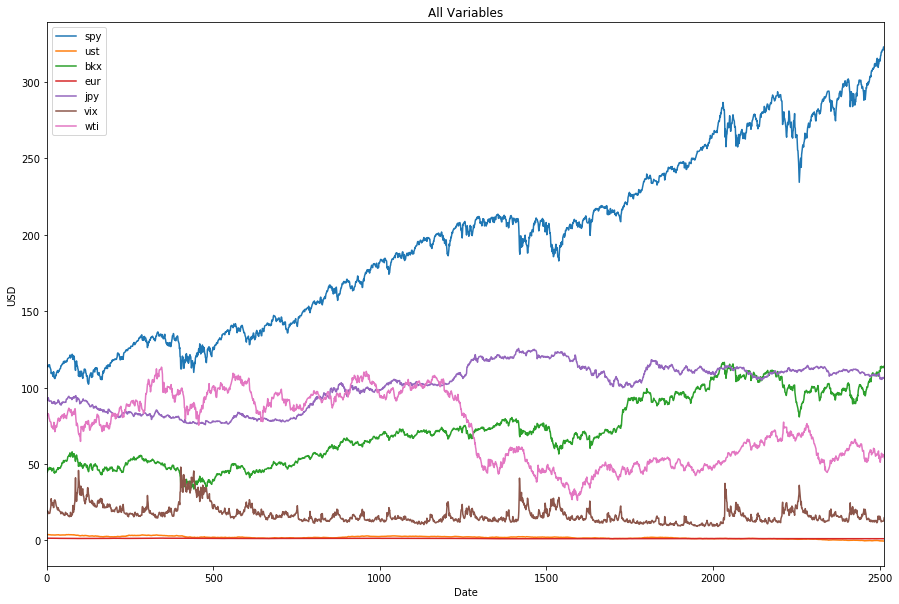

In [33]:
# Line charts
total_df.plot(figsize=(15,10))
plt.ylabel('USD')
plt.xlabel('Date')
plt.title('All Variables')

### From the line chart above, it appears that some scaling could be helpful. The 3 Month - 10 Year US Treasury spread is shown in orange, and the EUR/USD cross in in red. Neither data set is displayed very well in this chart given the magnitudes of the other data -- especially the SPY price. Let's break them out below.

Text(0.5, 1.0, 'Line Plot of UST and EUR Data')

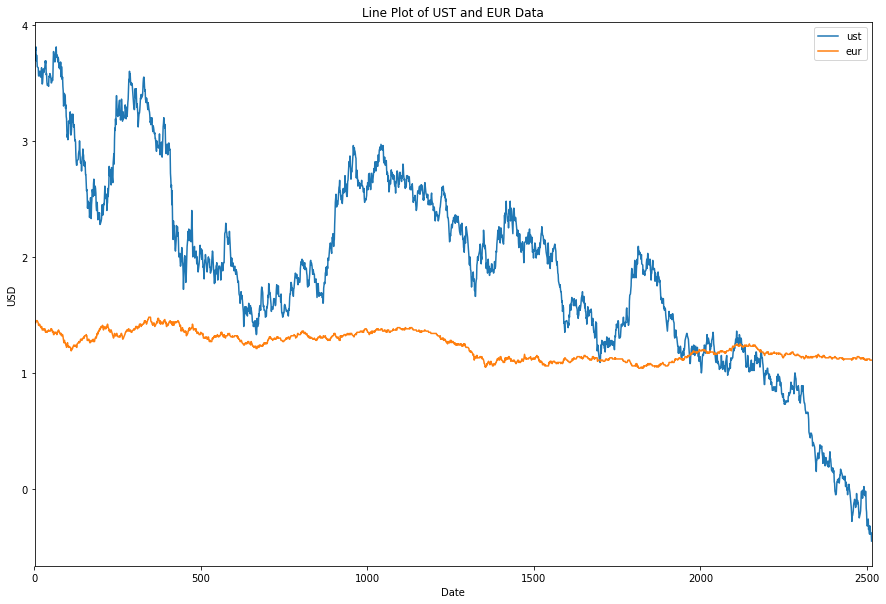

In [34]:
# Line charts of UST and EUR data
x1 = pd.DataFrame(pd.concat([total_df['ust'], total_df['eur']], axis=1))

x1.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Line Plot of UST and EUR Data')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41a538a630>,
      dtype=object)

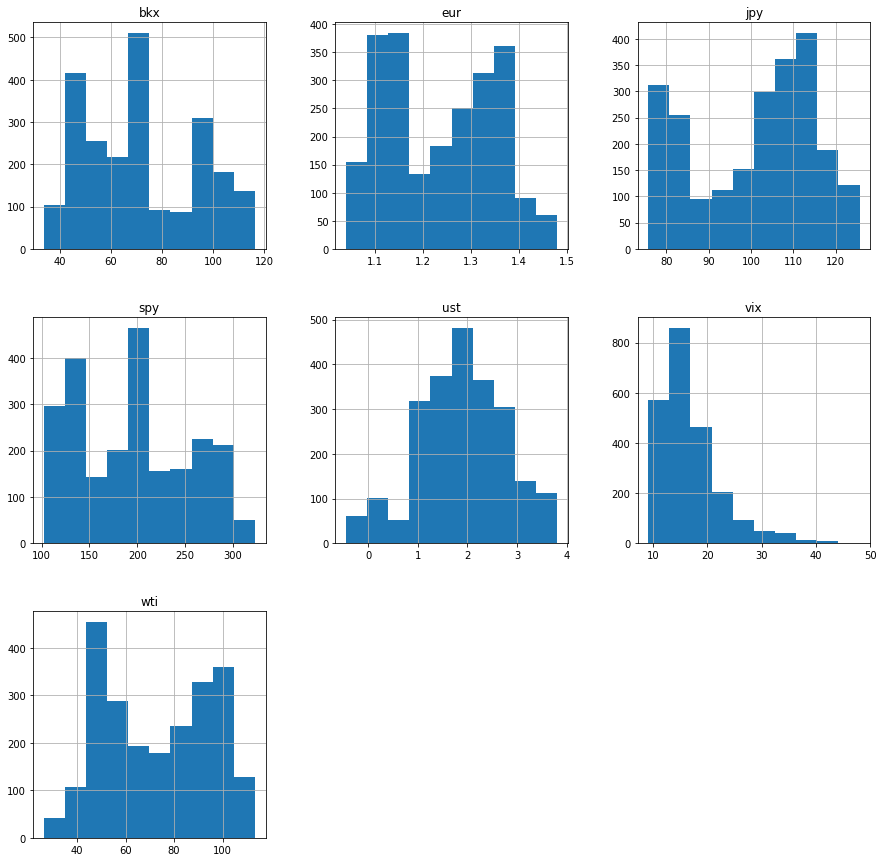

In [35]:
# Histograms
total_df.hist(figsize=(15,15))

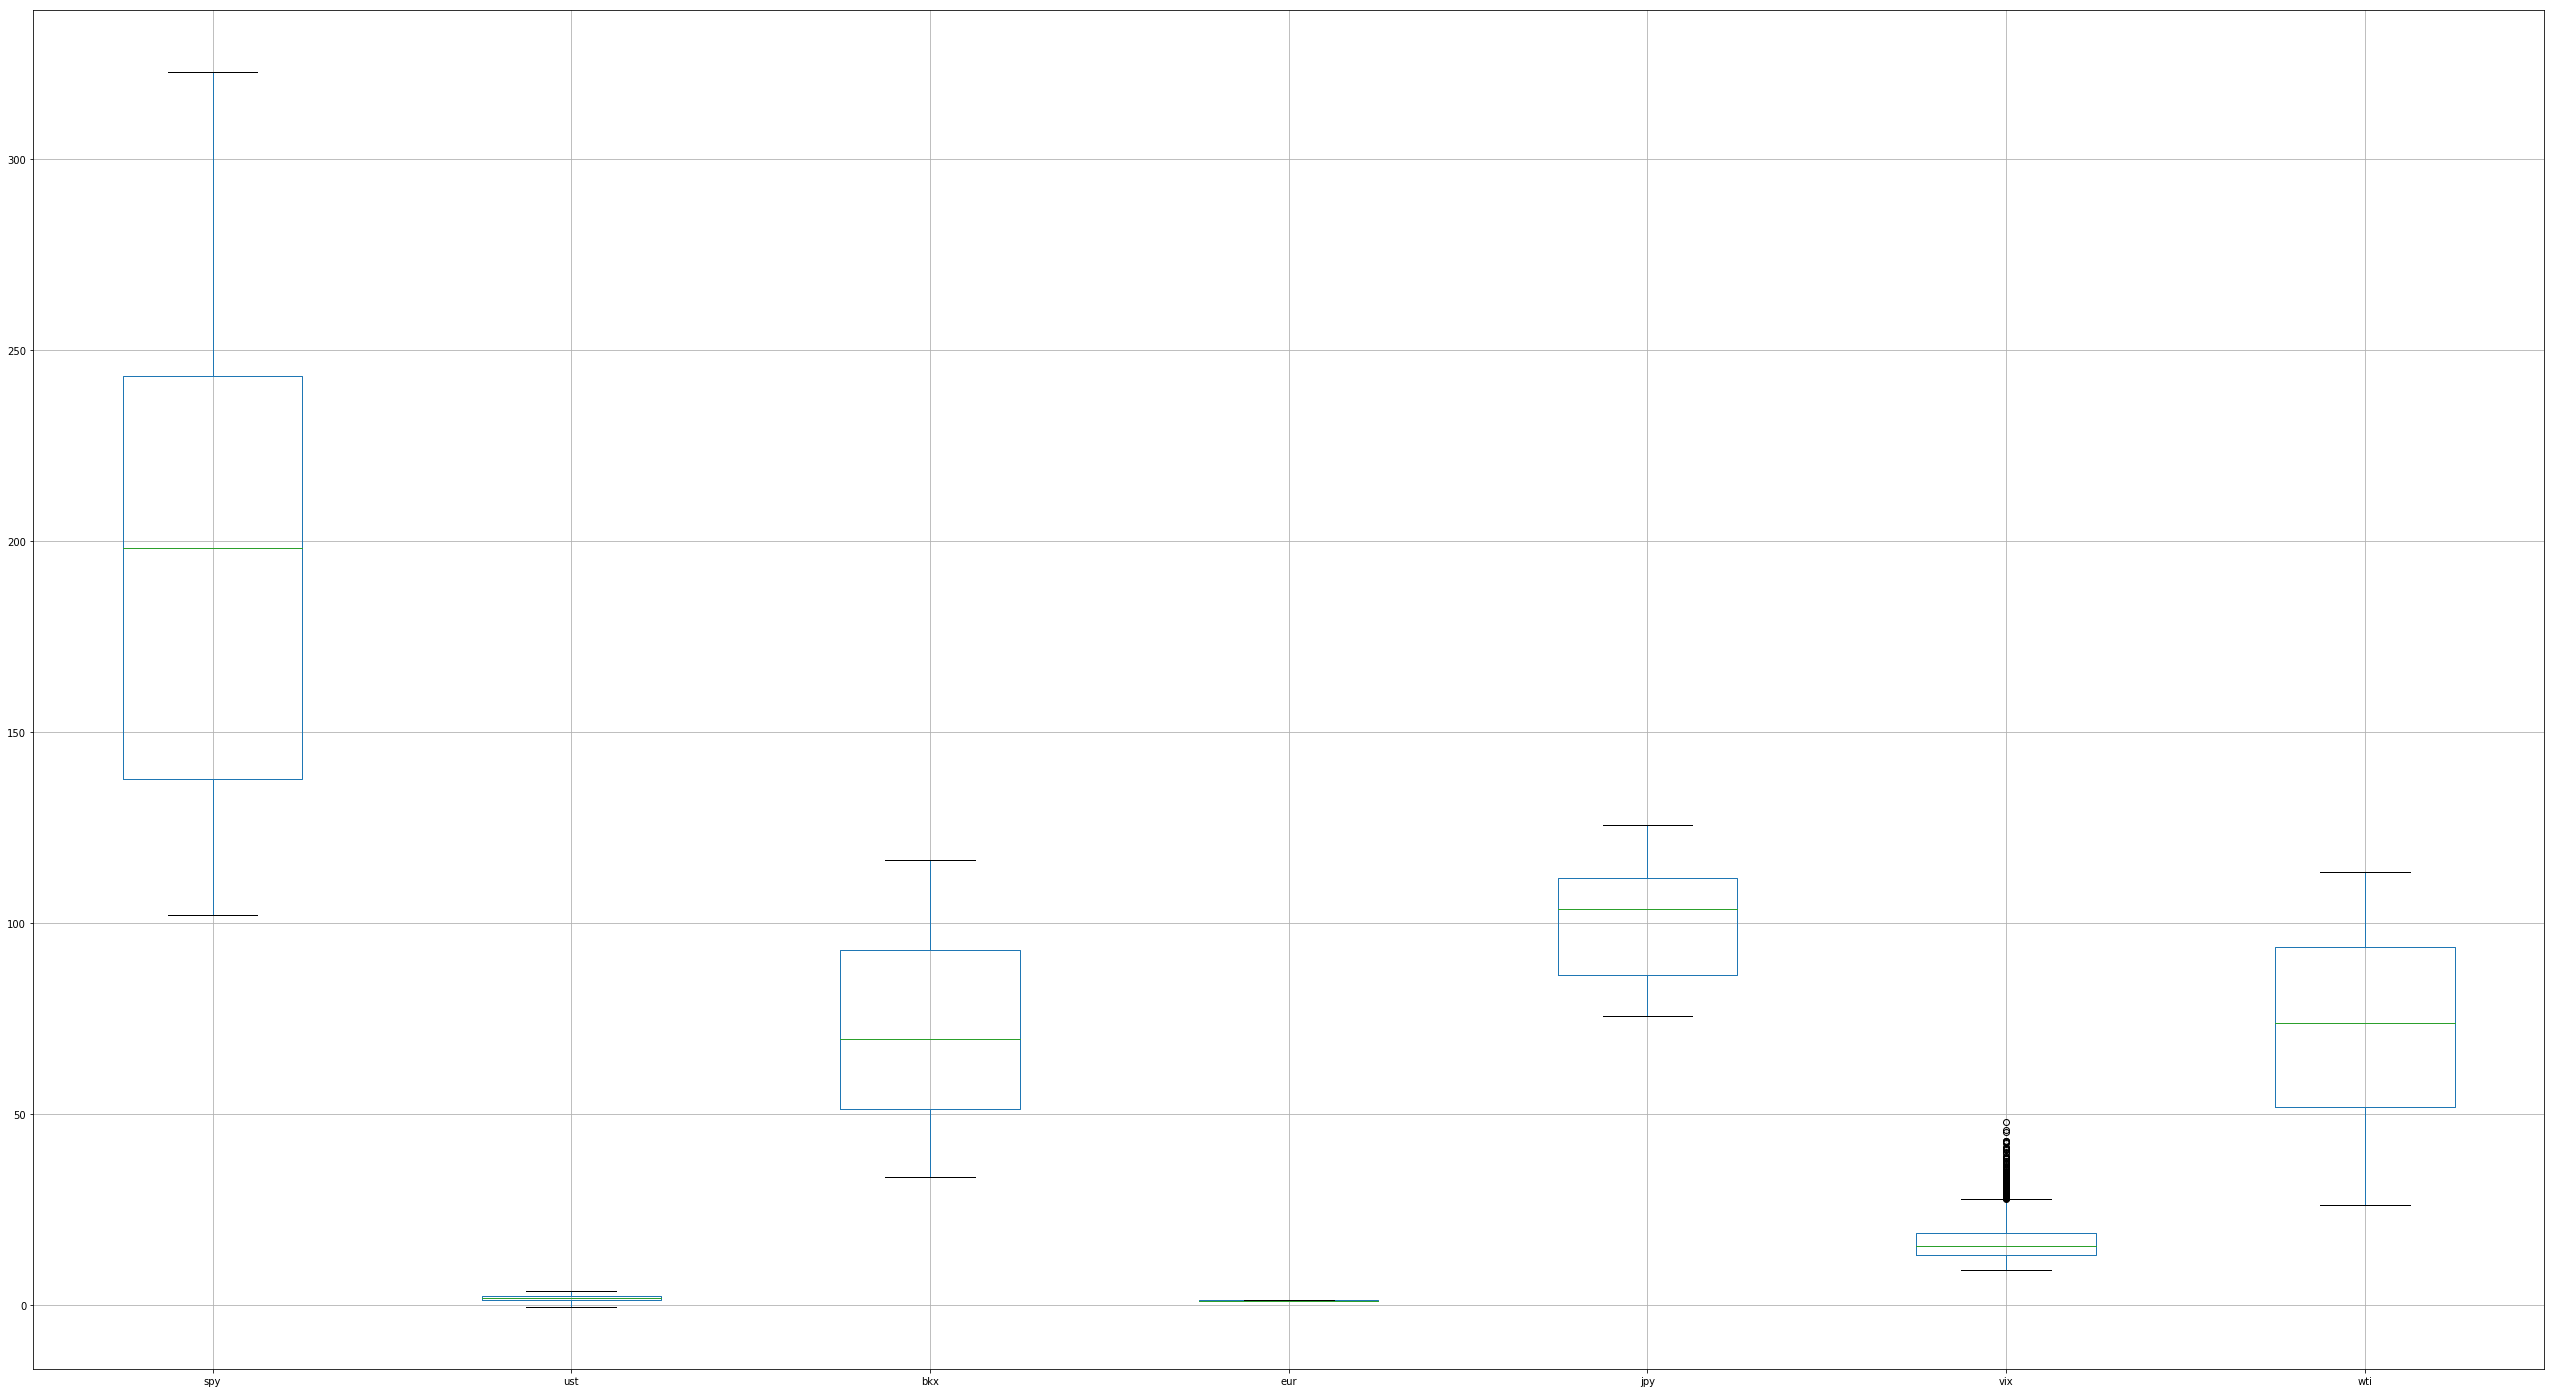

In [36]:
# Boxplots
total_df.boxplot(figsize=(45,25))

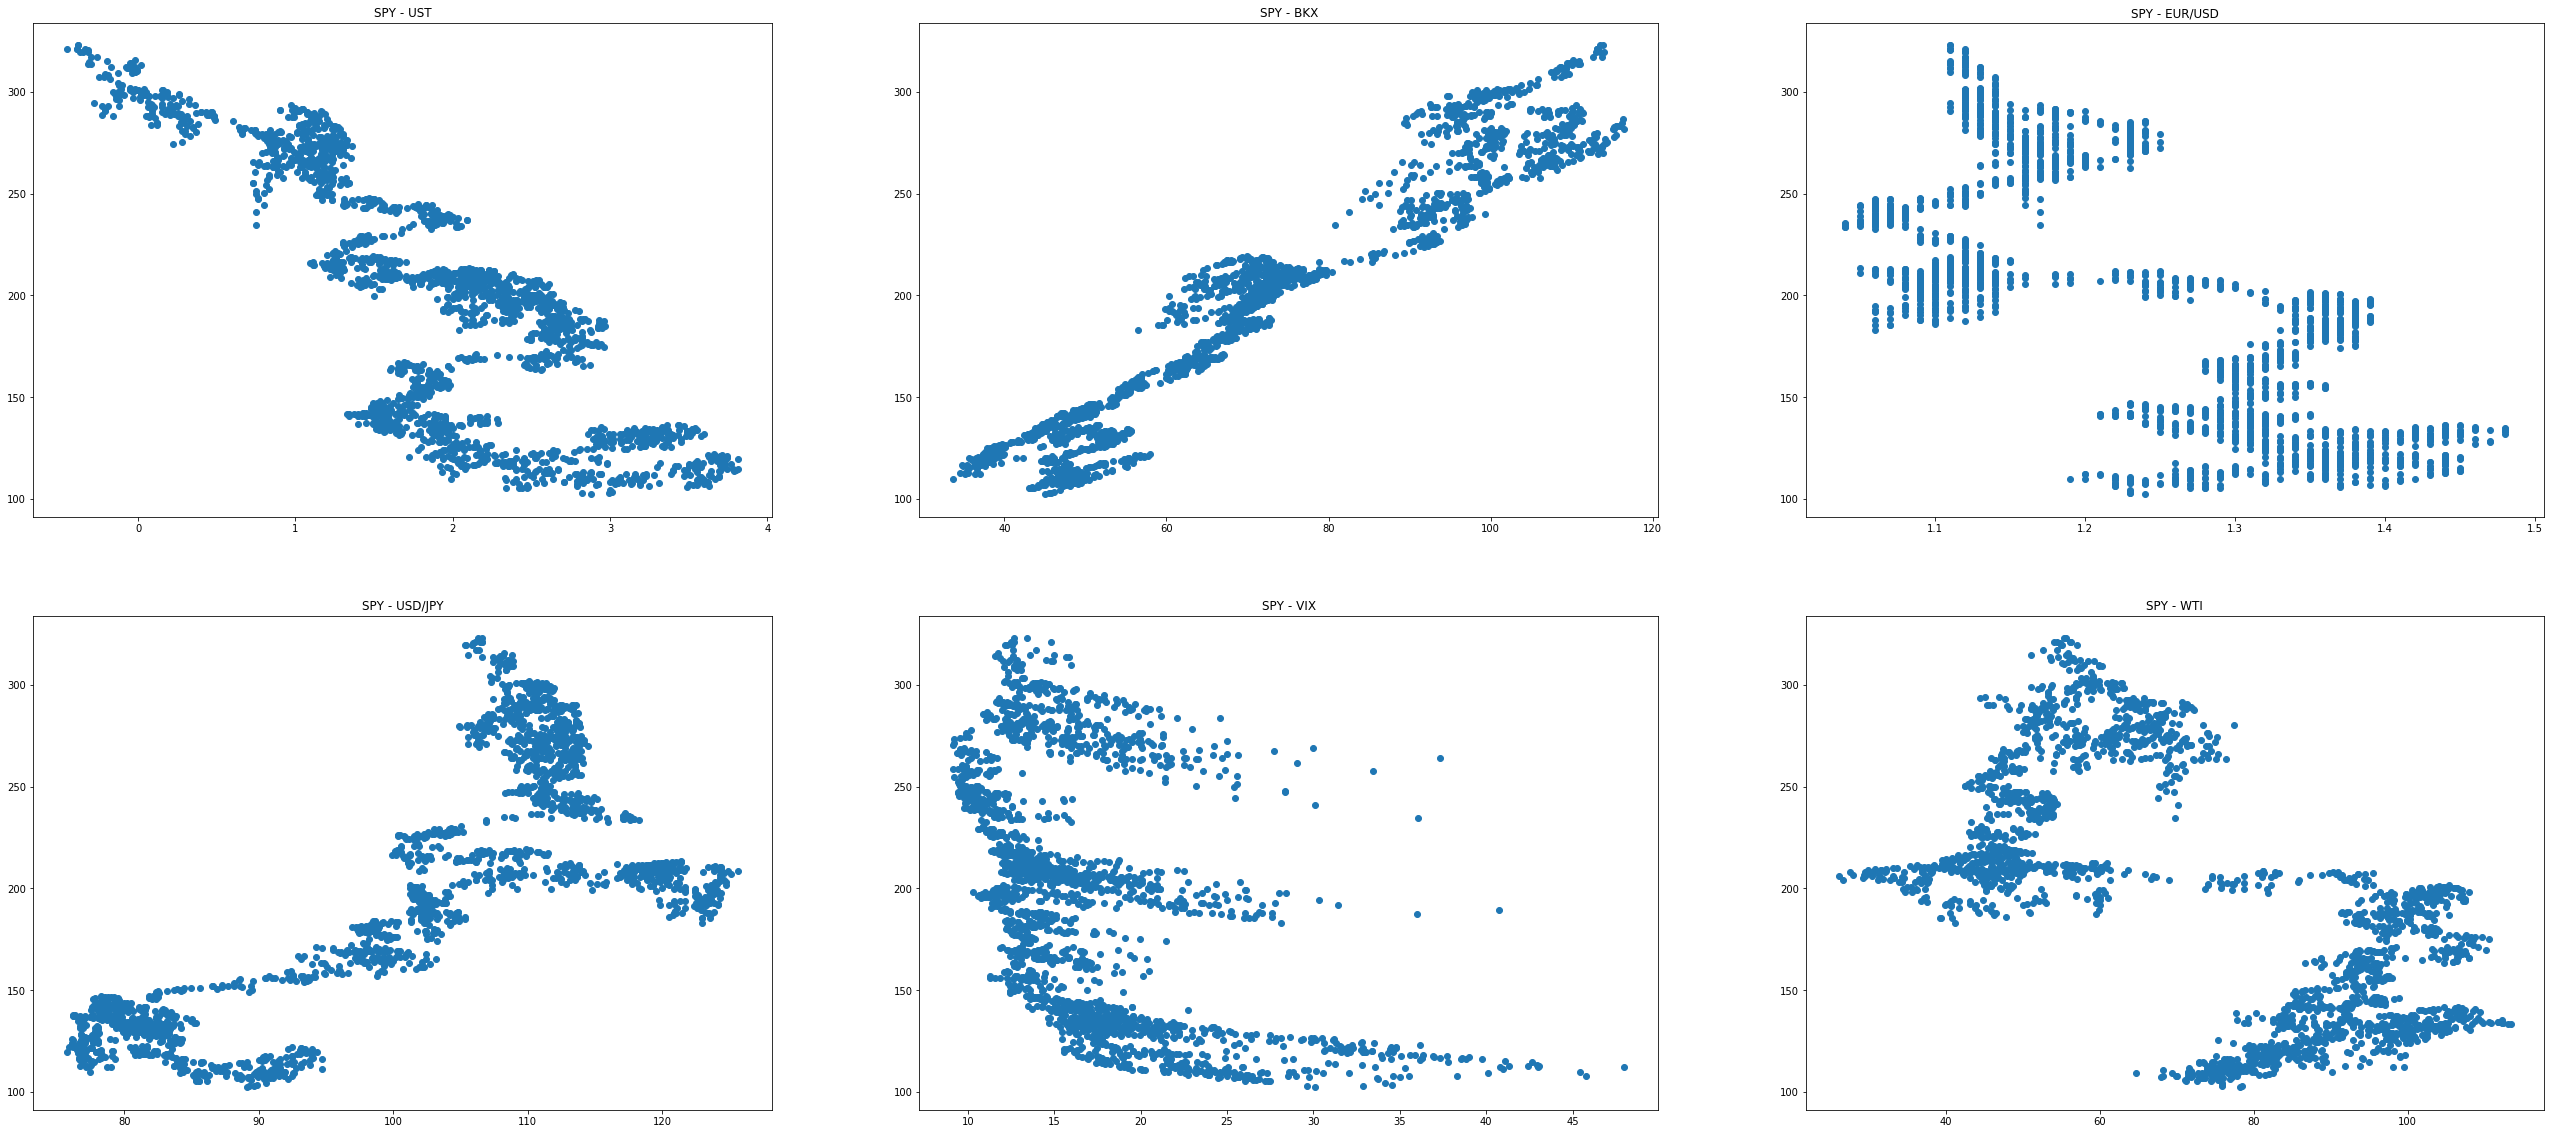

In [37]:
# Scatter plots of the the SPY close and each feature
f = plt.figure(figsize=(45,20))

# SPY - UST plot
ax = f.add_subplot(231)
plt.title('SPY - UST')
plt.scatter(total_df['ust'], total_df['spy'])

# SPY - BKX plot
ax1 = f.add_subplot(232)
plt.title('SPY - BKX')
plt.scatter(total_df['bkx'], total_df['spy'])

# SPY - EUR/USD plot
ax = f.add_subplot(233)
plt.title('SPY - EUR/USD')
plt.scatter(total_df['eur'], total_df['spy'])

# SPY - USD/JPY plot
ax = f.add_subplot(234)
plt.title('SPY - USD/JPY')
plt.scatter(total_df['jpy'], total_df['spy'])

# SPY - VIX plot
ax = f.add_subplot(235)
plt.title('SPY - VIX')
plt.scatter(total_df['vix'], total_df['spy'])

# SPY - WTI plot
ax = f.add_subplot(236)
plt.title('SPY - WTI')
plt.scatter(total_df['wti'], total_df['spy'])

Text(0.5, 1.0, 'Correlation Heatmap')

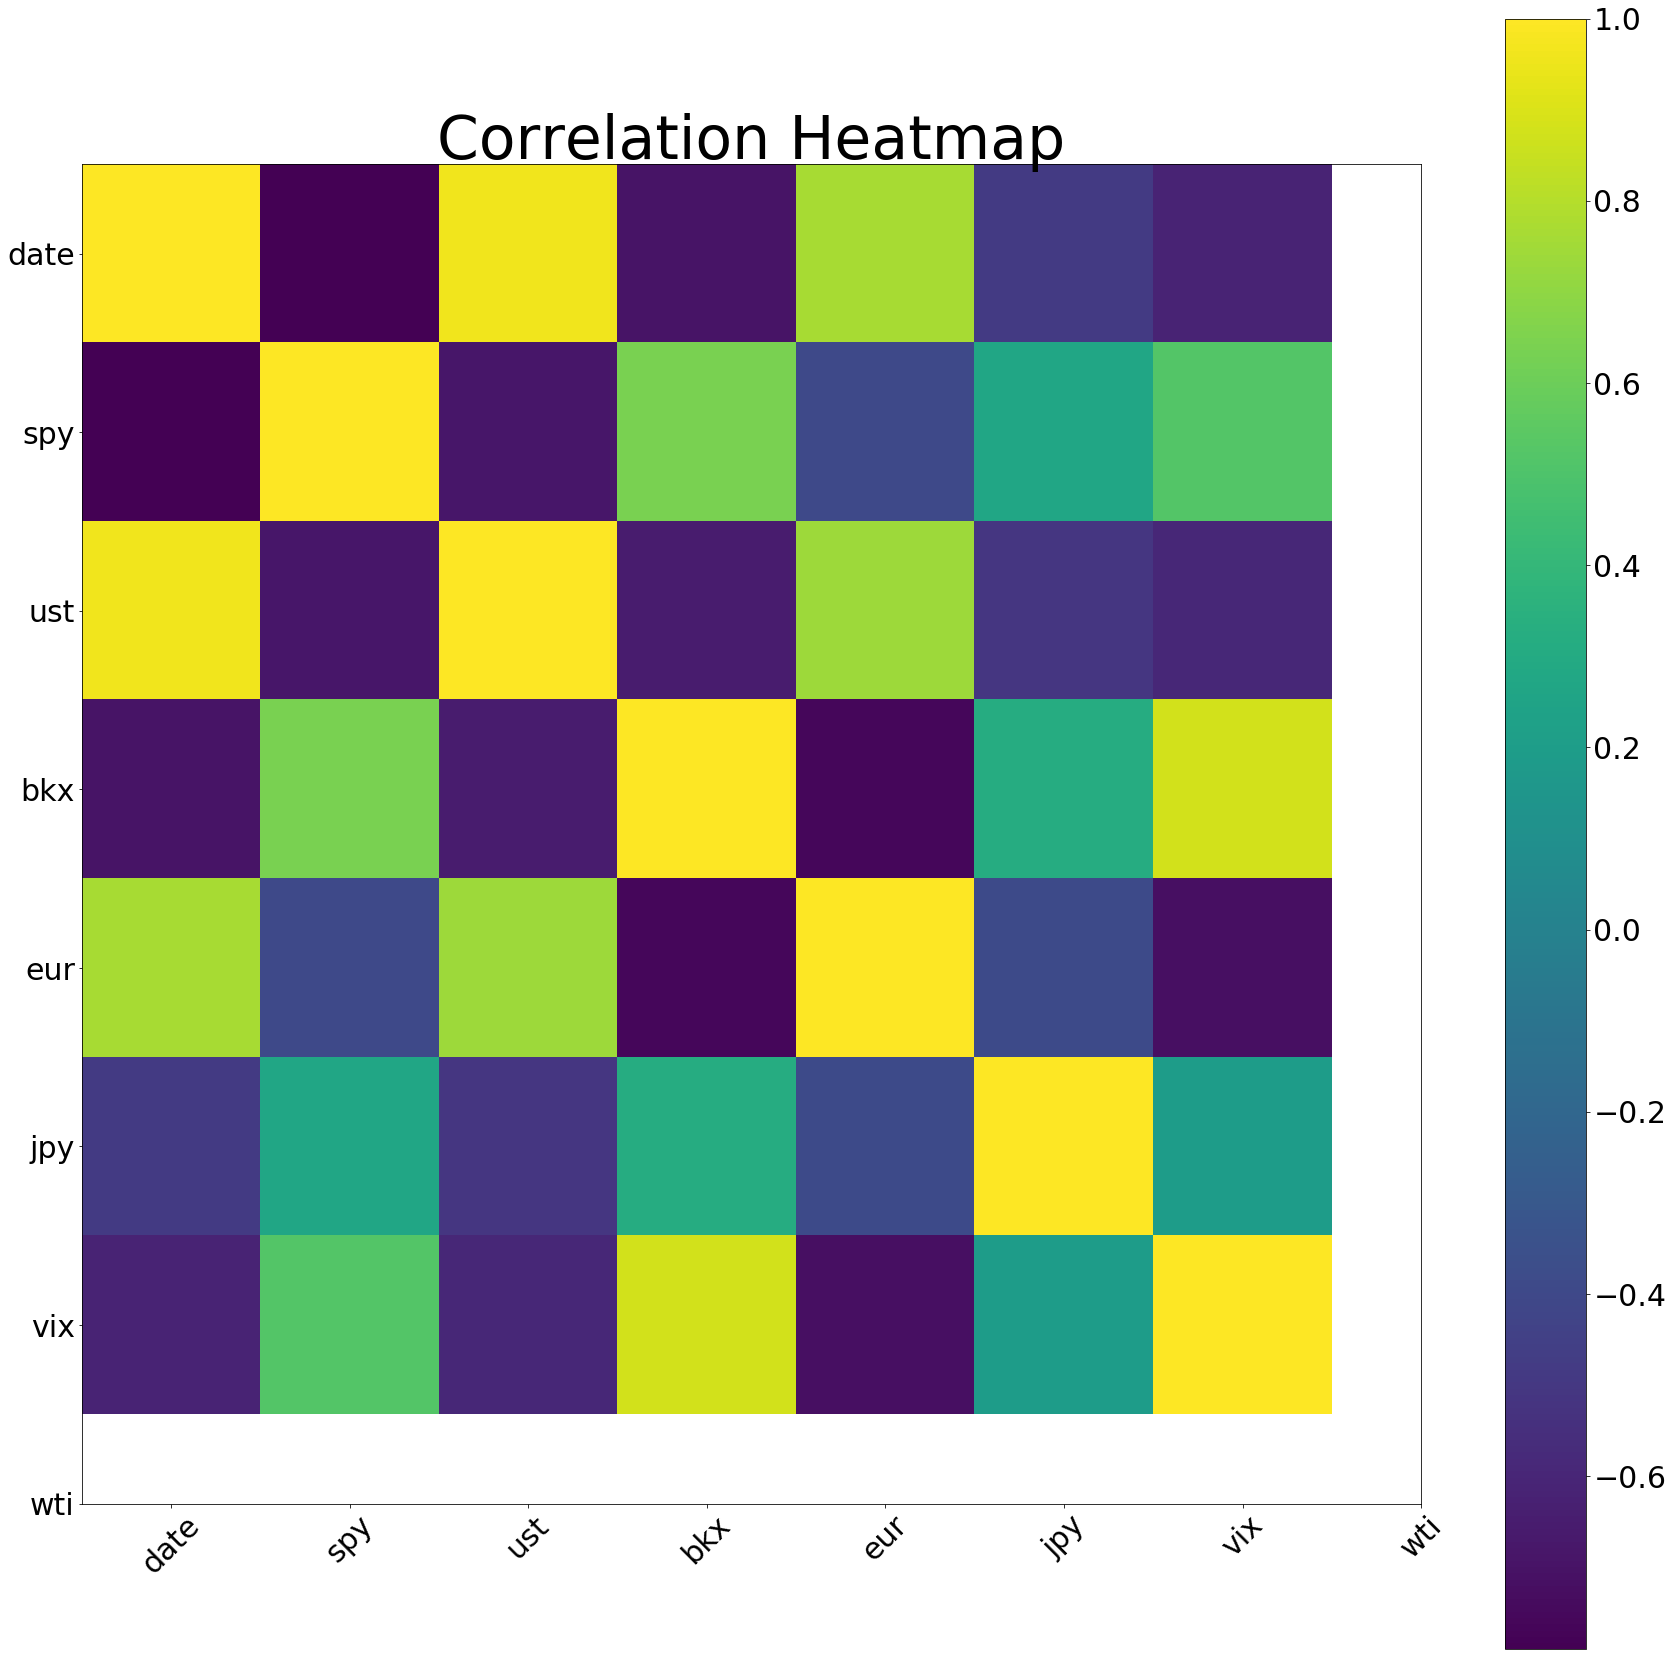

In [38]:
# Correlation heatmap
plt.figure(figsize=(30,30))
plt.imshow(total_df.corr())
plt.xticks(range(len(total_df.columns)), total_df.columns, rotation=45, fontsize=30)
plt.yticks(range(len(total_df.columns)), total_df.columns, fontsize=30)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
plt.title('Correlation Heatmap', size=60)

# MODELS

### Helper Functions

In [39]:
# SS Residual
def calc_ss_resid(y, yhat):
    return sum((y - yhat) ** 2)

# SS Explained
def calc_ss_explain(y, yhat):
    return sum((yhat - np.mean(y)) ** 2)

# SS Total
def calc_ss_total(ss_explain, ss_resid):
    return ss_explain + ss_resid

# R-squared
def calc_r2(ss_resid, ss_total):
        return 1 - float(ss_resid / ss_total)
    
# Adjusted R-squared
def calc_adjust_r2(ss_residual, ss_total, n, k):
    return 1 - (ss_residual / (n - k - 1)) / (ss_total / (n - 1))

# MSE
def calc_mse(ss_resid, num_obs):
    return ss_resid / num_obs

# RMSE
def calc_rmse(rmse):
    return math.sqrt(rmse)

# MAE
def calc_mae(y, yhat, num_obs):
    return sum(abs(y - yhat)) / num_obs

# TRAIN / TEST SPLITS

In [69]:
# Split the number of observations by 7/10 train/test
train_size = int(len(total_df) * 0.7)
test_size = int(len(total_df) - train_size)

print('Number of total training data observations: ', train_size)
print('Number of total test data observations: ', test_size)

# Train / test split
train = total_df[0:train_size]
test = total_df[train_size:len(total_df)]

# Split training data into 3 sets; 1 for each model
model_size = int(len(train) * 0.33)

# Split
train_ols = train[0:model_size]
train_pcr = train[model_size:(2 * model_size)]
train_arima = train[(2 * model_size):(3 * model_size)]

print('Number of OLS train / val data observations: ', len(train_ols))
print('Number of PCR train / val data observations: ', len(train_pcr))
print('Number of ARIMA train / val data observations: ', len(train_arima))

Number of total training data observations:  1617
Number of total test data observations:  694
Number of OLS train / val data observations:  533
Number of PCR train / val data observations:  533
Number of ARIMA train / val data observations:  533


## Linear Regression

In [60]:
# Train / Val split

# Drop date column
train_ols = train_ols.drop('date', axis=1)

# Split
val_size = int(len(train_ols) * 0.5)
train_ols_val = train_ols[val_size:len(train_ols)]
train_ols = train_ols[0:val_size]

print('Total number of OLS training observations: ', len(train_ols))
print('Total number of OLS validation observation: ', len(train_ols_val))
print(train_ols.columns)

# Create target vectors for both train and val sets
train_ols_Y = train_ols['spy']
train_ols_X = train_ols.drop('spy', axis=1)
train_ols_val_Y = train_ols_val['spy']
train_ols_val_X = train_ols_val.drop('spy', axis=1)

print('Number of OLS training X observations: ', len(train_ols_X))
print('Number of OLS training Y value observations: ', len(train_ols_Y))
print('Number of OLS validation X value observations: ', len(train_ols_val_X))
print('Number of OLS validation Y value observations: ', len(train_ols_val_Y))

Total number of OLS training observations:  266
Total number of OLS validation observation:  267
Index(['spy', 'ust', 'bkx', 'eur', 'jpy', 'vix', 'wti'], dtype='object')
Number of OLS training X observations:  266
Number of OLS training Y value observations:  266
Number of OLS validation X value observations:  267
Number of OLS validation Y value observations:  267


In [54]:
# Normality test

In [55]:
# Durbin-Watson test

In [61]:
# Linear regression model

# Run regression
regressor = LinearRegression()
regressor.fit(train_ols_X, train_ols_Y)

# Save intercept
ols_c = regressor.intercept_

# Save slopes
ols_B = regressor.coef_

print('Intercept: : ', ols_c)
print('Coefficients: ', ols_B)

# Predict
y_hat = regressor.predict(train_ols_val_X)

# Validate
ss_e = calc_ss_explain(train_ols_val_Y, y_hat)
ss_r = calc_ss_resid(train_ols_val_Y, y_hat)
ss_t = calc_ss_total(ss_e, ss_r)
r2 = calc_r2(ss_r, ss_t)
ar2 = calc_adjust_r2(ss_r, ss_t, len(y_hat), len(train_ols_val_X.columns))
mse = calc_mse(ss_r, len(y_hat))
rmse = calc_rmse(mse)

print('SSE: ', ss_e)
print('SSR: ', ss_r)
print('SST: ', ss_t)
print('R2: ', r2)
print('Adjusted R2: ', ar2)
print('MSE: ', mse)
print('RMSE: ', rmse)

Intercept: :  100.76176880353852
Coefficients:  [ 2.1925108   1.21954558 19.2894108  -1.07625201 -0.07242985  0.22822166]
SSE:  25926.71933173928
SSR:  17331.695493818297
SST:  43258.41482555758
R2:  0.5993451086058168
Adjusted R2:  0.5900992264967202
MSE:  64.91271720531198
RMSE:  8.056842880763654


### The results of the baseline linear regression model are above. The intercept is 100.76 and the coefficients are 2.19, 1.22, 19.29, -1.08, -0.07, and 0.23 for the UST, BKX, EUR, JPY, VIX, and WTI variables,  respectively. The magnitude of the EUR/USD cross is notable. It is positively correlated with the price of the SPY, but cross is a ratio, so there is an added layer to its interpretation. It infers that for every positive USD change in the price of the Euro, the price of the SPY will change by 19.29 USD. In short, the model suggests that as the price of the SPY goes up, the value of the USD goes down. This could be due to inflation as the US economy experience growth. And, that growth would be reflected in the price of the SPY. Pre-Brexit, the Euro was the second largest reserve currency of what was the second largest economy in the world. This deserves more attention, but it will be left for another project. The negative sign on the JPY coefficent suggests that for each increase in value (priced in Yen) of the USD, the price of the SPY (priced in USD) will decline by 1.08. This can be tricky, but remember that the quote price in the USD/JPY is the Yen. This agrees with theory. Historically, the Yen is a safe haven for investors seeking to limit losses in down markets. With such low interest rates, the BOJ is not able to cut rates as drastically as other reserve banks. The sign on the coefficient for the price of the VIX is, also negative. This makes sense given the fact that the VIX is considered to be a 'fear index'. What is interesting, however, is the magnitude. It doesn't seem to be that signficant. But, in the context of the timeframe of our data, it makes a bit more sense. The stock market, and the SPY, have been steadily increasing during this timeframe. One might think that the VIX, as a measure of volatility, would move higher along with those prices, but the VIX weights down moves in prices more heavily than moves upward. So, it really is more of a 'fear index' than it is a volatility index. The model has an R-squared of 0.599. These set of features explain 59.9% of the variability of the price of the SPY. Adjusting for degrees of freedom does not seem to have much of an effect. The Adjusted R-squared is 0.590. Finally, the Mean Squared Error is 64.91.

### Linear Regression - 14-Period Simple Moving Average

In [75]:
# Standardize data

# Drop 3 and 7-period SMA columns
train_14_sma = train_14_sma.drop('spy_3period_sma', axis=1)
train_14_sma = train_14_sma.drop('spy_7period_sma', axis=1)

# Create target vector
train_14_sma_Y = train_14_sma['spy_close']
train_14_sma_X = train_14_sma.drop('spy_close', axis=1)

print('Features: ', train_14_sma_X.columns)
print('Number X observations: ', len(train_14_sma_X))
print('Number Y observations: ', len(train_14_sma_Y))

Features:  Index(['bkx_close', 'brent_close', 'eur-chf_close', 'eur-usd_close',
       'spy_14period_sma', '5yr_tips_spread', 'vix_close', 'wti_close',
       '3-10_ust_spread'],
      dtype='object')
Number X observations:  100
Number Y observations:  100


In [76]:
# Normality test

In [77]:
# Train / validate splits

# Validation data size 40%
val_size = int(len(train_14_sma_X) * 0.4)

# Target data
train_14_sma_Y_val = train_14_sma_Y[int(val_size * 1.5):len(train_14_sma_Y)]
train_14_sma_Y = train_14_sma_Y[0:int(val_size * 1.5)]

# Training data
train_14_sma_X_val = train_14_sma_X[int(val_size * 1.5):len(train_14_sma_X)]
train_14_sma_X = train_14_sma_X[0:int(val_size * 1.5)]

print('Number of Y-train observations: ', len(train_14_sma_Y))
print('Number of Y-val observations: ', len(train_14_sma_Y_val))
print('Number of X-train observations: ', len(train_14_sma_X))
print('Number of X-val observations: ', len(train_14_sma_X_val))

# Fit regression
regressor = LinearRegression()
regressor.fit(train_14_sma_X, train_14_sma_Y)

# Save intercept
_14_sma_c = regressor.intercept_

# Save slopes
_14_sma_B = regressor.coef_

print('Intercept: : ', _14_sma_c)
print('Coefficients: ', _14_sma_B)

# Predict
y_val = regressor.predict(train_14_sma_X_val)

# Validate
ss_e = calc_ss_explain(train_14_sma_Y, y_val)
ss_r = calc_ss_resid(train_14_sma_Y_val, y_val)
ss_t = calc_ss_total(ss_e, ss_r)
r2 = calc_r2(ss_r, ss_t)
ar2 = calc_adjust_r2(ss_r, ss_t, len(y_val), len(train_14_sma_X_val.columns))
mse = calc_mse(ss_r, len(y_val))
rmse = calc_rmse(mse)

print('SSE: ', ss_e)
print('SSR: ', ss_r)
print('SST: ', ss_t)
print('R2: ', r2)
print('Adjusted R2: ', ar2)
print('MSE: ', mse)
print('RMSE: ', rmse)

Number of Y-train observations:  60
Number of Y-val observations:  40
Number of X-train observations:  60
Number of X-val observations:  40
Intercept: :  25.90181902426805
Coefficients:  [ 0.45805041 -0.07748616  2.14209597 19.44631692  0.25509407 -0.91529004
 -0.7402617   0.18793453 -2.93571496]
SSE:  4541.645145627131
SSR:  285.3473243282853
SST:  4826.992469955416
R2:  0.9408850695118401
Adjusted R2:  0.9231505903653923
MSE:  7.133683108207133
RMSE:  2.6708955629539566


## Principal Components Regression

#### PCA data should be centered, not scaled before using Singular Value Decomposition to project it to a lower dimensional space.

In [70]:
# Train / Val split

# Drop date column
train_pcr = train_pcr.drop('date', axis=1)

# Split 50/50 train/val
val_size = int(len(train_pcr) * 0.5)
train_pcr_val = train_pcr[val_size:len(train_pcr)]
train_pcr = train_pcr[0:val_size]

print('Total number of PCR training observations: ', len(train_pcr))
print('Total number of OLS validation observation: ', len(train_pcr_val))
print(train_pcr.columns)

# Create target vectors for both train and val sets
train_pcr_Y = train_pcr['spy']
train_pcr_X = train_pcr.drop('spy', axis=1)
train_pcr_val_Y = train_pcr_val['spy']
train_pcr_val_X = train_pcr_val.drop('spy', axis=1)

print('Number of PCR training X observations: ', len(train_pcr_X))
print('Number of PCR training Y value observations: ', len(train_pcr_Y))
print('Number of PCR validation X value observations: ', len(train_pcr_val_X))
print('Number of PCR validation Y value observations: ', len(train_pcr_val_Y))

Total number of PCR training observations:  266
Total number of OLS validation observation:  267
Index(['spy', 'ust', 'bkx', 'eur', 'jpy', 'vix', 'wti'], dtype='object')
Number of PCR training X observations:  266
Number of PCR training Y value observations:  266
Number of PCR validation X value observations:  267
Number of PCR validation Y value observations:  267


In [71]:
# Normality test

In [72]:
### PCA

var1 = 0.95
pca = PCA(var1)

# Center training data
train_pcr_X -= train_pcr_X.mean(axis=0)

# Fit the PCA model
train_pcr_X = pca.fit_transform(train_pcr_X)

print('Dimensions of compenents: ', train_pcr_X.shape)
print('Number of components that account for', var1, ' of the variance: ', pca.n_components_)
print('These components explain ', sum(pca.explained_variance_ratio_), 'percent of the variance')

# Run regression
regressor = LinearRegression()
regressor.fit(train_pcr_X, train_pcr_Y)

# Save intercept
pcr_c = regressor.intercept_

# Save slopes
pcr_B = regressor.coef_

print('Intercept: : ', pcr_c)
print('Coefficients: ', pcr_B)

# Prediction

# Center training data
train_pcr_val_X -= train_pcr_val_X.mean(axis=0)

# Fit the PCA model; keep only the first two components
train_pcr_val_X = pca.fit_transform(train_pcr_val_X)[:,0:3]

train_pcr_val_X = pd.DataFrame(train_pcr_val_X)
print("train_pcr_val_X head: ", train_pcr_val_X.head(3))

# Predict
y_hat = regressor.predict(train_pcr_val_X)

# Validate
ss_e = calc_ss_explain(train_pcr_val_Y, y_hat)
ss_r = calc_ss_resid(train_pcr_val_Y, y_hat)
ss_t = calc_ss_total(ss_e, ss_r)
r2 = calc_r2(ss_r, ss_t)
ar2 = calc_adjust_r2(ss_r, ss_t, len(y_hat), len(train_pcr_val_X.columns))
mse = calc_mse(ss_r, len(y_hat))
rmse = calc_rmse(mse)

print('SSE: ', ss_e)
print('SSR: ', ss_r)
print('SST: ', ss_t)
print('R2: ', r2)
print('Adjusted R2: ', ar2)
print('MSE: ', mse)
print('RMSE: ', rmse)

Dimensions of compenents:  (266, 3)
Number of components that account for 0.95  of the variance:  3
These components explain  0.9842369993464242 percent of the variance
Intercept: :  145.79515037593984
Coefficients:  [ 1.10951385 -0.2745305  -0.68356697]
train_pcr_val_X head:            0          1         2
0 -1.625886   8.956906 -0.937094
1 -1.104098   8.886483 -0.173160
2 -1.392007  10.510284  3.117710
SSE:  328486.4249033223
SSR:  361245.9692151724
SST:  689732.3941184947
R2:  0.47625198947360003
Adjusted R2:  0.4702776775664548
MSE:  1352.98115810926
RMSE:  36.78289219337245


### The results of the Principal Components Regression are less promising than the those of the Linear Regression. PCR implements Principal Component Analysis on the feature set. The resulting principal components are then used as inputs to a linear regression to model the dependent variable. The decrease in performance was expected. PCA removes data from our set which helps to limit overfitting. In doing so, the portion of the dependent variable's variance explained by the resulting explanatory principal components used in the linear regression is likely to decrease. A strength of the PCR model is that by using the principal components from the PCA decrease multicolinearity. This helps to ensure that one of the assumptions required of linear regression models, namely that our explanatory variables are independent, holds. Unfortunately, the interpretation of PCR models can be difficult given that the inputs to the linear regression model are more complex. The R-squared and Adjusted R-squared of our model are 0.476 and 0.470, respectively. It has a Mean Squared Error of 1352.98.

### A note worth mentioning about PCA is that because it is unsupervised, it does not consider the response variable when choosing which principal components to drop. It chooses principal components that capture the greatest amount of variation. However, there might not be reason to believe that the principal components with the greatest variance are the best explanatory variables to use to predict a response variable.

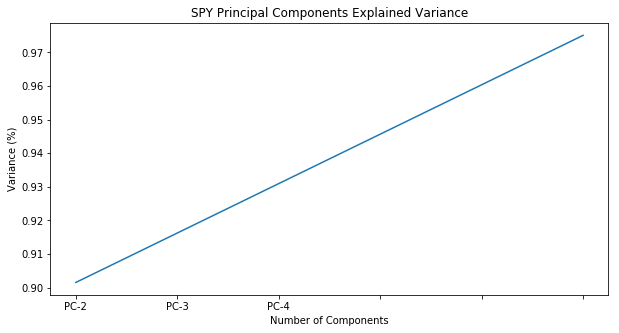

In [81]:
# TODO: Fix this !!
#Plotting the Cumulative Summation of the Explained Variance
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
xlabels = ['PC-1', 'PC-2', 'PC-3', 'PC-4']
ax.set_xticklabels(xlabels)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('SPY Principal Components Explained Variance')
plt.show()

### While Principal Component Regression can be used to handle colinearities among the explanatory variables, or perhaps more importantly, to model data for which there are more explanatory variables then there are observations, it is not without drawbacks. The largest of which is that because it is unsupervised, it does not consider the response variable when choosing which principal components to drop. It chooses principal components that capture the greatest amount of variation. However, there is not no reason to believe that principal components with the greatest variance are the best to predict the response variable.

## Autoregression - LOOKBACK PERIOD??

In [82]:
# Remove SMA data and all but pca data from above, and create target vector
train_autoreg_Y = train_autoreg['spy_close']
train_autoreg_X = train_autoreg.drop('spy_close', axis=1)
train_autoreg_X = train_autoreg_X.drop('spy_3period_sma', axis=1)
train_autoreg_X = train_autoreg_X.drop('spy_7period_sma', axis=1)
train_autoreg_X = train_autoreg_X.drop('spy_14period_sma', axis=1)
# TODO: Drop the compenents not used in the PCA model above
print('Features: ', train_autoreg_X.columns)

Features:  Index(['bkx_close', 'brent_close', 'eur-chf_close', 'eur-usd_close',
       '5yr_tips_spread', 'vix_close', 'wti_close', '3-10_ust_spread'],
      dtype='object')


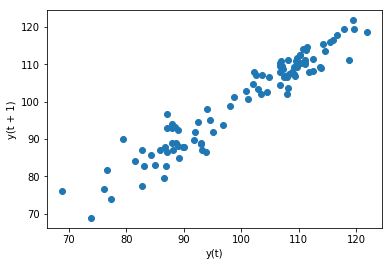

In [83]:
# Lag plot
lag_plot(train_autoreg['spy_close'])

### From the lag plot shown above, a strong correlation between each daily close of the SPY and the previous day's close. Let's calculate the correlation between them below.

In [96]:
# Pearson correlation coefficient
values = pd.DataFrame(train_autoreg['spy_close'])
correlation_df = pd.concat([values.shift(1), values], axis=1)
correlation_df.columns = ['t-1', 't']
result = correlation_df.corr()
print(result)

          t-1         t
t-1  1.000000  0.960025
t    0.960025  1.000000


### As suspected, the correlation of 0.96 is very high. From the autocorrelation plot below, we can see the correlation between each value and previous values. The dashed line represents the 95% confident interval for those values.

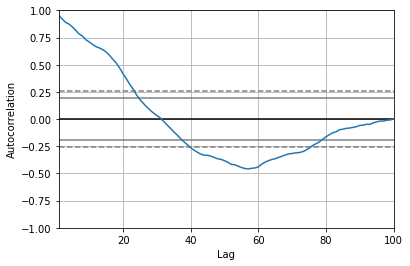

In [85]:
autocorrelation_plot(train_autoreg['spy_close'])

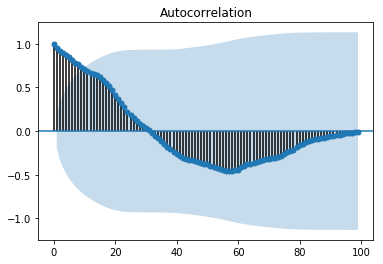

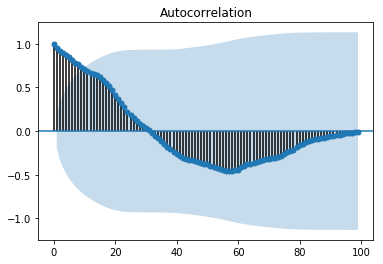

In [89]:
# Autocorrelation line plot
plot_acf(train_autoreg['spy_close'])

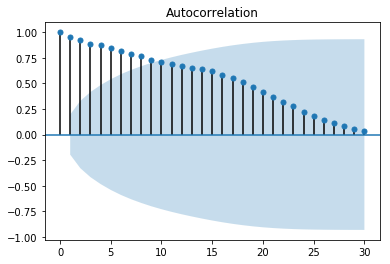

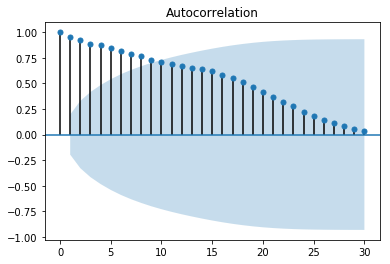

In [90]:
# Autocorrelation line plot with a limit of 30 lag periods displayed
plot_acf(train_autoreg['spy_close'], lags=30)

### The autocorrelation plot above seems to reveal a slow decay. This suggests that the data follow a long-memory process. 

/home/optimus/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


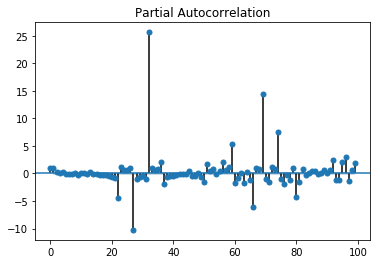

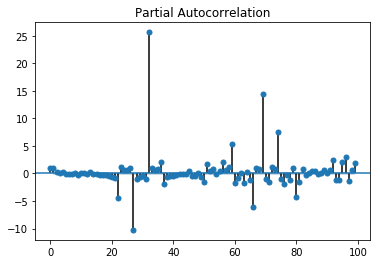

In [93]:
# Partial autocorrelation function plot
plot_pacf(train_autoreg['spy_close'])

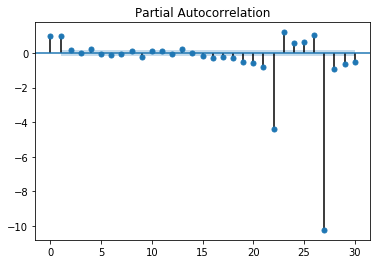

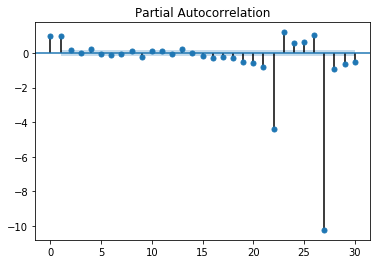

In [94]:
# Partial autocorrelation function plot with 30-lag limit
plot_pacf(train_autoreg['spy_close'], lags=30)

### From the Partial Autocorrelation Function plots above, we can see... In order to make this time series data stationary, 

### Train / Test Split

### Kolmogorov-Smirnov Test

![title](images/kolmogorov-smirnov_equatioin.svg)
- where {\displaystyle I_{[-\infty ,x]}(X_{i})}I_{[-\infty ,x]}(X_{i}) is the indicator function, equal to 1 if {\displaystyle X_{i}\leq x}X_{i}\leq x and equal to 0 otherwise.

In [ ]:
# Check for normality using Kolmogorov-Smirnov

In [ ]:
# Goldfeld-Quandt Test